In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r'D:\YT\YTpaper\insiderinformedcyber\GPU\CSCI\oil_prediction_final.csv')
df.head()

,Unnamed: 0,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx,oil_return
0,0,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42,-0.007825
1,1,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11,-0.036917
2,2,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45,0.005647
3,3,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47,0.000000
4,4,2000-01-10,24.71,65.595398,58.127548,72.726173,44.18,0.011190,1457.60,-0.003238


In [3]:
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.head()

,date,value,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx,oil_return
0,2000-01-04,25.56,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42,-0.007825
1,2000-01-05,24.65,47.565075,47.418663,56.502644,123.22,0.001922,1402.11,-0.036917
2,2000-01-06,24.79,52.012840,51.852737,59.469170,53.61,0.000956,1403.45,0.005647
3,2000-01-07,24.79,41.667515,41.539261,54.446617,42.03,0.027090,1441.47,0.000000
4,2000-01-10,24.71,65.595398,58.127548,72.726173,44.18,0.011190,1457.60,-0.003238


In [5]:
dflable=df['oil_return']


In [6]:
df1=df.drop(['oil_return','date','value'],axis=1)
df1.head()

,GPRD,GPRD_ACT,GPRD_THREAT,daily_policy_index,sprtrn,spindx
0,93.751915,116.829170,71.461182,109.31,-0.038345,1399.42
1,47.565075,47.418663,56.502644,123.22,0.001922,1402.11
2,52.012840,51.852737,59.469170,53.61,0.000956,1403.45
3,41.667515,41.539261,54.446617,42.03,0.027090,1441.47
4,65.595398,58.127548,72.726173,44.18,0.011190,1457.60


In [7]:
df1.dtypes

GPRD                  float64
GPRD_ACT              float64
GPRD_THREAT           float64
daily_policy_index    float64
sprtrn                float64
spindx                float64
dtype: object

In [8]:
## Standardize the data using StandardScaler() from Sklearn
scaler=StandardScaler()
df2=scaler.fit_transform(df1)
print(df2)

[[-0.30368246  0.02015037 -0.65121552 -0.01984014 -3.12404065 -0.5409102 ]
 [-0.98332767 -0.63673972 -0.87283723  0.15248064  0.13377898 -0.53837427]
 [-0.91787824 -0.59477634 -0.82888597 -0.70986656  0.05562432 -0.53711102]
 ...
 [ 0.96813989  1.13752296  0.33907212  0.43121663  0.0939735   2.64753109]
 [ 0.12211115  0.27628935 -0.28739472  0.71453628  0.00821373  2.64919971]
 [ 1.57298154  0.93899123  2.75104622 -0.04164349 -0.25036008  2.63645409]]


In [9]:
## Instantiate PCA and choose how many components
MyPCA_2=PCA(n_components=2)

# Project the original data into the PCA space
Result_2=MyPCA_2.fit_transform(df2)

## Print the values of the first component 
#print(Result[:,0]) 
# print(Result) ## Print the new (transformed) dataset
# print("The eigenvalues:", MyPCA.explained_variance_)
MyPCA_2.explained_variance_


array([2.45746604, 1.21316967])

In [10]:
MyCoV_2=np.cov(Result_2.T)
MyCoV_2

array([[ 2.45746604e+00, -1.13459918e-16],
       [-1.13459918e-16,  1.21316967e+00]])

In [11]:
MyPCA_2.explained_variance_ratio_

array([0.40950956, 0.20216132])

In [24]:
## Instantiate PCA and choose how many components
MyPCA=PCA(n_components=3)

# Project the original data into the PCA space
Result=MyPCA.fit_transform(df2)

## Print the values of the first component 
#print(Result[:,0]) 
# print(Result) ## Print the new (transformed) dataset
# print("The eigenvalues:", MyPCA.explained_variance_)
MyPCA.explained_variance_


array([2.45746604, 1.21316967, 0.99877028])

In [25]:
MyCoV=np.cov(Result.T)



In [26]:
MyCoV

array([[ 2.45746604e+00, -1.13459918e-16,  1.32369904e-16],
       [-1.13459918e-16,  1.21316967e+00, -1.18187414e-17],
       [ 1.32369904e-16, -1.18187414e-17,  9.98770277e-01]])

In [27]:
MyPCA.explained_variance_ratio_

array([0.40950956, 0.20216132, 0.16643403])

In [21]:
## Instantiate PCA and choose how many components
MyPCA_5=PCA(n_components=5)

# Project the original data into the PCA space
Result=MyPCA_5.fit_transform(df2)

## Print the values of the first component 
#print(Result[:,0]) 
# print(Result) ## Print the new (transformed) dataset
# print("The eigenvalues:", MyPCA.explained_variance_)
MyPCA_5.explained_variance_


array([2.45746604, 1.21316967, 0.99877028, 0.92361847, 0.4005515 ])

In [19]:
MyCoV=np.cov(Result.T)
MyCoV

array([[ 2.45746604e+00, -1.13459918e-16,  1.32369904e-16,
         3.16742271e-16, -3.19106019e-17,  8.00719733e-16],
       [-1.13459918e-16,  1.21316967e+00, -1.18187414e-17,
        -1.46552394e-16,  5.86209576e-16, -4.03314552e-17],
       [ 1.32369904e-16, -1.18187414e-17,  9.98770277e-01,
         0.00000000e+00, -6.38212038e-17,  3.55300915e-17],
       [ 3.16742271e-16, -1.46552394e-16,  0.00000000e+00,
         9.23618467e-01, -4.01837209e-16,  6.00539800e-17],
       [-3.19106019e-17,  5.86209576e-16, -6.38212038e-17,
        -4.01837209e-16,  4.00551501e-01, -1.44631848e-16],
       [ 8.00719733e-16, -4.03314552e-17,  3.55300915e-17,
         6.00539800e-17, -1.44631848e-16,  7.42205157e-03]])

In [20]:
MyPCA_5.explained_variance_ratio_

array([0.40950956, 0.20216132, 0.16643403, 0.15391081, 0.06674748,
       0.0012368 ])


#################################################
## Visualize the transformed 3D dataset
## we just created using PCA
#################################################

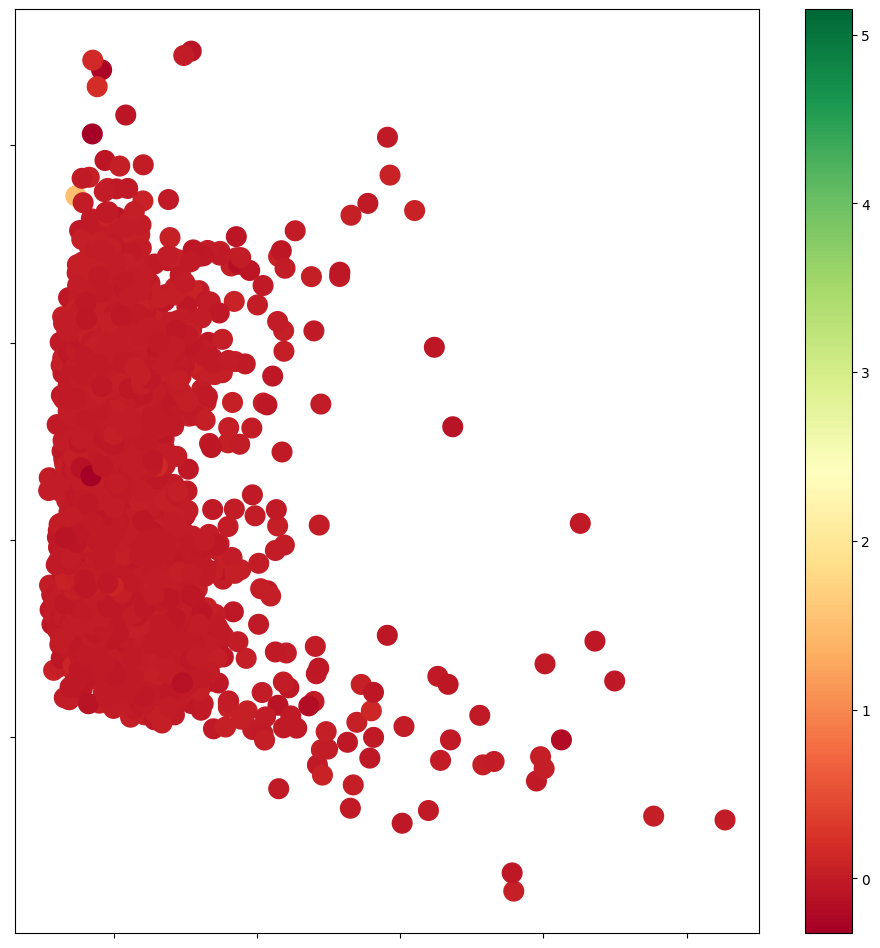

In [14]:
fig1 = plt.figure(figsize=(12, 12))
ax2 = fig1.add_subplot(111)
# ax2 = Axes3D(fig2, rect=[0, 0, .90, 1], elev=48, azim=134)

x=Result_2[:,0]
y=Result_2[:,1] 

scatter =ax2.scatter(x,y, cmap="RdYlGn", s=200, c=dflable)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.colorbar(scatter)
plt.show()

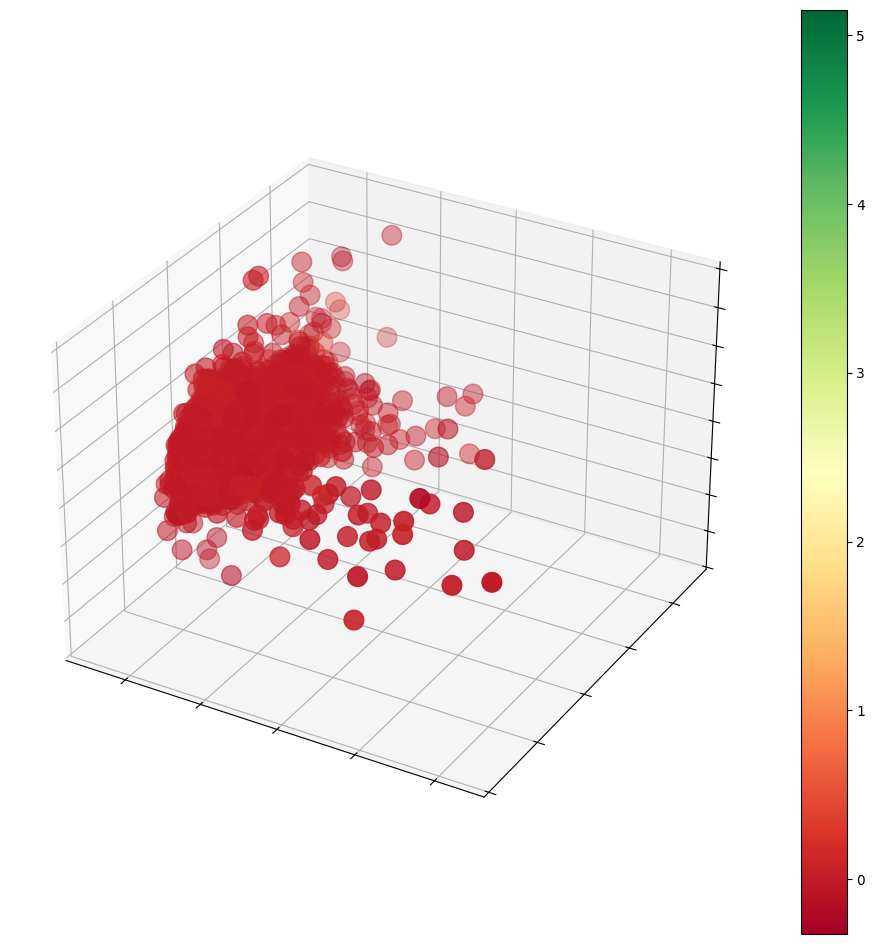

In [28]:
fig2 = plt.figure(figsize=(12, 12))
ax2 = fig2.add_subplot(111, projection='3d')
# ax2 = Axes3D(fig2, rect=[0, 0, .90, 1], elev=48, azim=134)

x=Result[:,0]
y=Result[:,1] 
z=Result[:,2]

scatter =ax2.scatter(x,y,z, cmap="RdYlGn", s=200, c=dflable)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_zticklabels([])
plt.colorbar(scatter)
plt.show()


###############################################
## Create a DF of the most important features
##################################################

In [29]:
shape= MyPCA.components_.shape[0]
shape

3

In [30]:
feature_names=['GPRD','GPRD_ACT','GPRD_THREAT','daily_policy_index','sprtrn','spindx']

most_important = [np.abs(MyPCA.components_[i]).argmax() for i in range(shape)]   
most_important_names = [feature_names[most_important[i]] for i in range(shape)] 

# Build a doctionary of the imprtant features by PC
MyDic = {'PC{}'.format(i): most_important_names[i] for i in range(shape)}

# build the dataframe
Important_DF = pd.DataFrame(MyDic.items())
Important_DF.head()

,0,1
0,PC0,GPRD
1,PC1,spindx
2,PC2,sprtrn
